In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To Scale our data
from sklearn.preprocessing import scale


# To perform KMeans clustering 
from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Let's read the dataset first
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
data.shape

(167, 10)

In [6]:
#chnaging the % of gdpp value to actual value
data['exports']=(data['exports']/100)*data['gdpp']
data['health']=(data['health']/100)*data['gdpp']
data['imports']=(data['imports']/100)*data['gdpp']

In [7]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
country= data.pop('country')
df_country= pd.DataFrame(country)
df_country['ID'] = df_country.index


In [9]:
df_country

,country,ID
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,Angola,3
4,Antigua and Barbuda,4
5,Argentina,5
6,Armenia,6
7,Australia,7
8,Austria,8
9,Azerbaijan,9


In [10]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
data.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [12]:
data['ID'] =data.index

In [13]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,4


In [14]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ID            0
dtype: int64

In [15]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

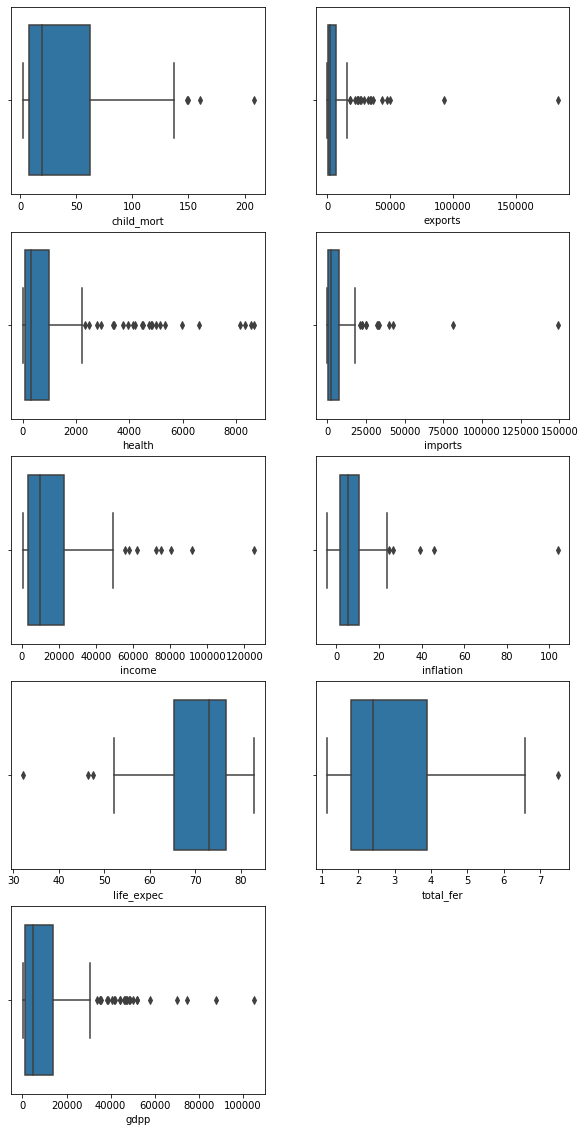

In [16]:
# Check outliers
plt.figure(figsize=(10,20))
var=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 
       'life_expec', 'total_fer', 'gdpp' ]
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data=data)

In [17]:
#outlier treatment
q1=data['child_mort'].quantile(0.00)
q4=data['child_mort'].quantile(0.99)
data=data[(data['child_mort']>=q1) & (data['child_mort']<=q4)]

q1=data['exports'].quantile(0.00)
q4=data['exports'].quantile(0.99)
data=data[(data['exports']>=q1) & (data['exports']<=q4)]

q1=data['health'].quantile(0.00)
q4=data['health'].quantile(0.99)
data=data[(data['health']>=q1) & (data['health']<=q4)]

q1=data['imports'].quantile(0.00)
q4=data['imports'].quantile(0.99)
data=data[(data['imports']>=q1) & (data['imports']<=q4)]

q1=data['income'].quantile(0.00)
q4=data['income'].quantile(0.99)
data=data[(data['income']>=q1) & (data['income']<=q4)]

q1=data['inflation'].quantile(0.00)
q4=data['inflation'].quantile(0.99)
data=data[(data['inflation']>=q1) & (data['inflation']<=q4)]

q1=data['gdpp'].quantile(0.00)
q4=data['gdpp'].quantile(0.99)
data=data[(data['gdpp']>=q1) & (data['gdpp']<=q4)]

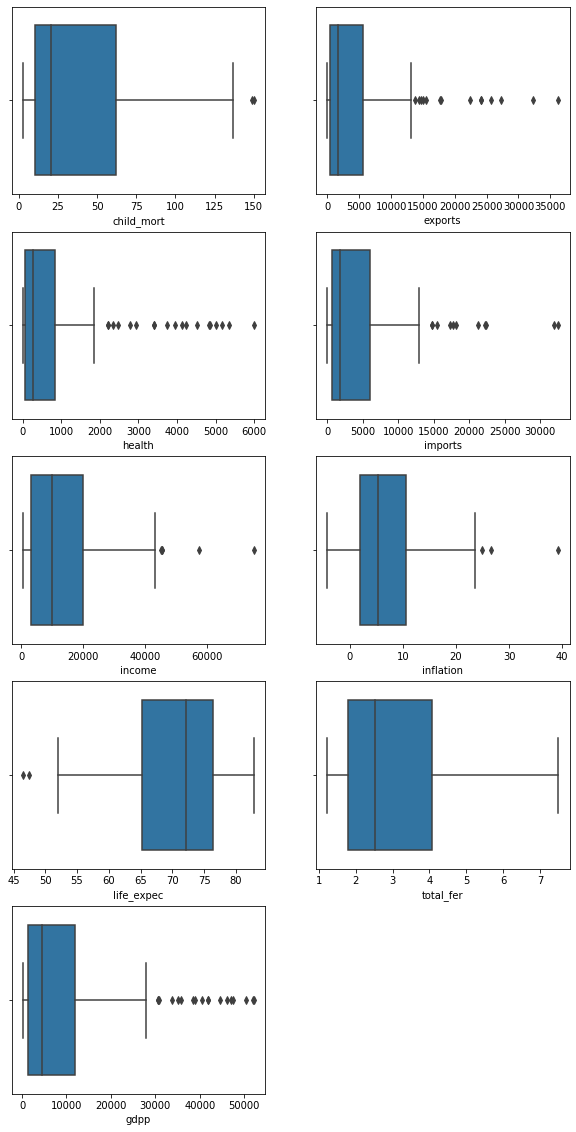

In [18]:
# Check outliers
plt.figure(figsize=(10,20))
var=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 
       'life_expec', 'total_fer', 'gdpp' ]
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data=data)

In [19]:
ID= data['ID']

In [20]:
data_1= data.drop('ID', axis= 1)

In [21]:
data_1.shape

(153, 9)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_2= scaler.fit_transform(data_1)


In [23]:
# Check the current variance of each column
round(100*data_1.var()/sum(data_1.var()),4)

child_mort     0.0003
exports       10.0746
health         0.3756
imports        7.9335
income        43.1757
inflation      0.0000
life_expec     0.0000
total_fer      0.0000
gdpp          38.4402
dtype: float64

In [24]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(svd_solver= 'randomized', random_state=42)
pca.fit(data_2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [25]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[-0.3140561 ,  0.35765828,  0.35402695,  0.36695996,  0.37300037,
        -0.15974019,  0.33930899, -0.2986964 ,  0.38007669],
       [ 0.49986179,  0.32524748,  0.24821799,  0.27165534,  0.15892397,
         0.13449061, -0.36476592,  0.52032823,  0.24860266],
       [-0.1484672 ,  0.0844332 , -0.122045  , -0.02273771,  0.19803024,
         0.94817761,  0.11689081, -0.05786486, -0.01216499],
       [-0.03201104,  0.4852042 , -0.59910401,  0.43062384,  0.04183951,
        -0.11340666, -0.20045008, -0.15693053, -0.3738591 ],
       [ 0.01745058, -0.0913332 ,  0.16394438, -0.11538738,  0.12988988,
         0.05714654, -0.73529188, -0.61066801,  0.13211753],
       [ 0.09674624, -0.06710637, -0.38591657, -0.41086995,  0.77347676,
        -0.19467105,  0.03129425,  0.12293398,  0.12702747],
       [-0.78549703, -0.01966561,  0.00898234, -0.00589078,  0.01911007,
        -0.04615325, -0.39504147,  0.4704638 ,  0.05101996],
       [ 0.04055259, -0.64215499, -0.32344998,  0.59019454,  0

In [26]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.65533722, 0.15334543, 0.10042449, 0.03985705, 0.02001271,
       0.01926572, 0.00926382, 0.00145676, 0.00103679])

Text(0, 0.5, 'Cumulative Variance')

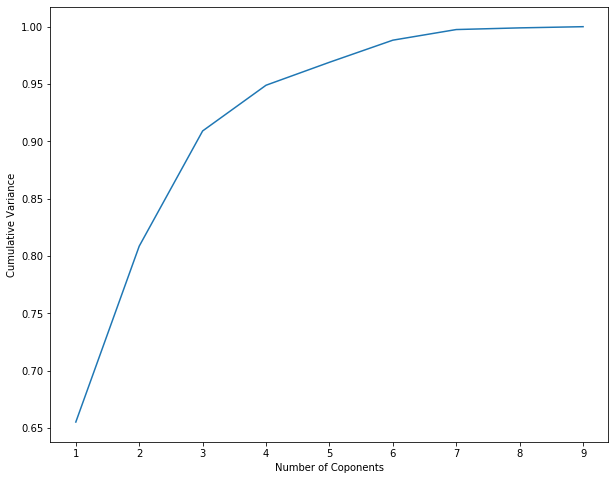

In [27]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [28]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)
df_pca = pca_final.fit_transform(data_2)
df_pca.shape

(153, 4)

In [29]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [30]:
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.963562,1.470368,-0.341024,0.068586
1,-0.007975,-1.609026,-0.179953,-0.035654
2,-0.542104,-0.794967,1.393593,0.268362
3,-3.001812,2.340129,1.445621,0.298847
4,1.221350,-0.804278,-0.468334,-0.308608


In [31]:
#Let's add back the ID to the given principal components
pca_df2 = pd.DataFrame({'ID': list(ID),'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [32]:
pca_df2.head()

,ID,PC1,PC2,PC3,PC4
0,0,-2.963562,1.470368,-0.341024,0.068586
1,1,-0.007975,-1.609026,-0.179953,-0.035654
2,2,-0.542104,-0.794967,1.393593,0.268362
3,3,-3.001812,2.340129,1.445621,0.298847
4,4,1.221350,-0.804278,-0.468334,-0.308608


In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(pca_df2.drop('ID', axis=1))

0.8262150614272696

In [35]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
dat3_1 = pca_df2.drop('ID', axis = 1)

In [36]:
dat3_1.head()

,PC1,PC2,PC3,PC4
0,-2.963562,1.470368,-0.341024,0.068586
1,-0.007975,-1.609026,-0.179953,-0.035654
2,-0.542104,-0.794967,1.393593,0.268362
3,-3.001812,2.340129,1.445621,0.298847
4,1.221350,-0.804278,-0.468334,-0.308608


# KMeans clustering

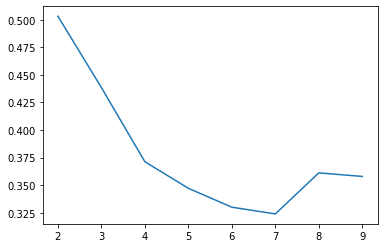

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss= []
for k in range(2, 10):
    kmeans = KMeans(n_clusters= k).fit(dat3_1)
    ss.append([k,silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

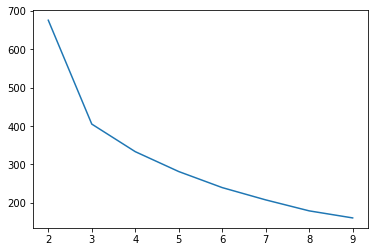

In [38]:
#Now let's proceed to the elbow curve method
ssd= []
for k in range(2, 10):
    kmeans = KMeans(n_clusters= k).fit(dat3_1)
    ssd.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [39]:
#Let's perform K means using K=3
model_kmean= KMeans(n_clusters=3, random_state=50, ).fit(dat3_1)

In [40]:
pca_df2.columns

Index(['ID', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [41]:
# Let's add the cluster Ids to the PCs data 
dat_km= pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis=1)],axis=1)
dat_km.columns= ['ID', 'PC1', 'PC2','PC3', 'PC4','ClusterID']
dat_km.head()

,ID,PC1,PC2,PC3,PC4,ClusterID
0,0,-2.963562,1.470368,-0.341024,0.068586,0
1,1,-0.007975,-1.609026,-0.179953,-0.035654,1
2,2,-0.542104,-0.794967,1.393593,0.268362,1
3,3,-3.001812,2.340129,1.445621,0.298847,0
4,4,1.221350,-0.804278,-0.468334,-0.308608,1


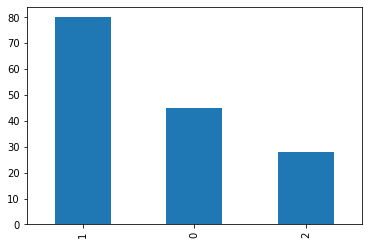

In [42]:
dat_km['ClusterID'].value_counts().plot(kind='bar')

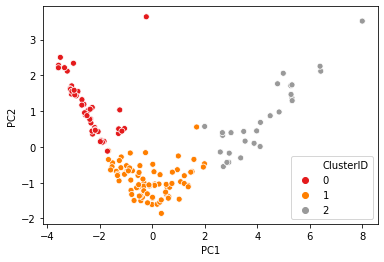

In [62]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot( x='PC1', y='PC2', hue= 'ClusterID', data= dat_km,palette='Set1')
plt.savefig("Clusters.png")

In [44]:
# Let's merge the original data with the data(ClusterID)
dat5= pd.merge(data,dat_km[['ID', 'ClusterID']], on='ID')

In [45]:
#dat_5= pd.concat([dat5,pd.Series(country)],axis=1)
#dat_5.head()

In [63]:
dat_5=pd.merge(dat5,df_country, on ='ID')
dat_5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,4,1,Antigua and Barbuda


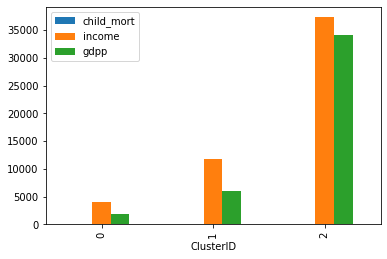

In [64]:
dat_5[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind='bar')
plt.savefig("Cluster_visualisation.png")

In [48]:
#printing the name of the countries that are in cluster 0
country_list_km= dat_5[dat_5['ClusterID']==0]['country']
country_list_km

0                   Afghanistan
3                        Angola
16                        Benin
20                     Botswana
23                 Burkina Faso
24                      Burundi
26                     Cameroon
29     Central African Republic
30                         Chad
34                      Comoros
35             Congo, Dem. Rep.
36                  Congo, Rep.
38                Cote d'Ivoire
46            Equatorial Guinea
47                      Eritrea
52                        Gabon
53                       Gambia
56                        Ghana
60                       Guinea
61                Guinea-Bissau
68                         Iraq
75                        Kenya
76                     Kiribati
79                          Lao
82                      Lesotho
83                      Liberia
87                   Madagascar
88                       Malawi
91                         Mali
93                   Mauritania
100                  Mozambique
102     

# Hierarchical Clustering

In [49]:
data_2 = pd.DataFrame(data_2)
data_2.head()

,0,1,2,3,4,5,6,7,8
0,1.419092,-0.670080,-0.589705,-0.698936,-0.916793,0.336265,-1.718750,1.864837,-0.729029
1,-0.584056,-0.505676,-0.413177,-0.403260,-0.310558,-0.383295,0.729680,-0.883822,-0.455893
2,-0.292837,-0.420082,-0.477166,-0.503091,-0.094149,1.304400,0.754043,-0.066475,-0.427320
3,2.202933,-0.346690,-0.543860,-0.483725,-0.604203,2.220204,-1.243681,2.088948,-0.499138
4,-0.755521,0.158906,-0.047771,0.480319,0.357612,-0.826660,0.790587,-0.567430,0.170383


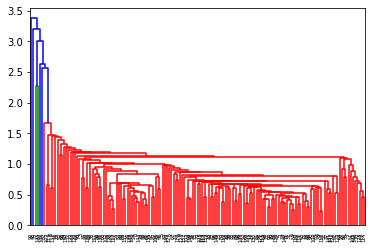

In [50]:
# single linkage
mergings = linkage(data_2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

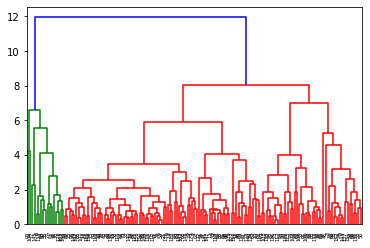

In [51]:
# complete linkage
mergings = linkage(data_2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0])

In [53]:
# assign cluster labels
data['cluster_labels'] = cluster_labels
final_data= pd.merge(data,df_country, on ='ID')
final_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,4,1,Antigua and Barbuda


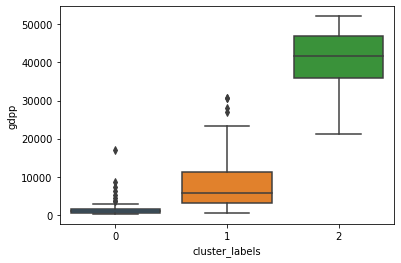

In [65]:
#plots
sns.boxplot(x='cluster_labels', y='gdpp', data=final_data)
plt.savefig("gdpp.png")

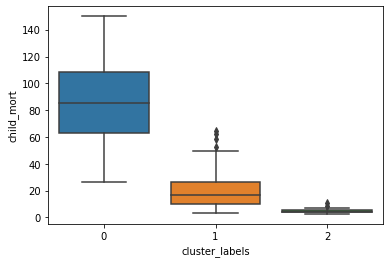

In [66]:
#plots
sns.boxplot(x='cluster_labels', y='child_mort', data=final_data)
plt.savefig("child_mort.png")

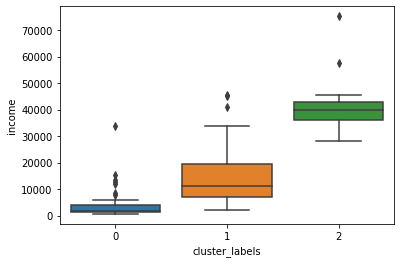

In [67]:
#plots
sns.boxplot(x='cluster_labels', y='income', data=final_data)
plt.savefig("income.png")

In [57]:
country_list_h= final_data[final_data['cluster_labels']==0]['country']
country_list_h

0                   Afghanistan
3                        Angola
16                        Benin
20                     Botswana
23                 Burkina Faso
24                      Burundi
26                     Cameroon
29     Central African Republic
30                         Chad
34                      Comoros
35             Congo, Dem. Rep.
36                  Congo, Rep.
38                Cote d'Ivoire
46            Equatorial Guinea
47                      Eritrea
52                        Gabon
53                       Gambia
56                        Ghana
60                       Guinea
61                Guinea-Bissau
68                         Iraq
75                        Kenya
76                     Kiribati
79                          Lao
82                      Lesotho
83                      Liberia
87                   Madagascar
88                       Malawi
91                         Mali
93                   Mauritania
97                     Mongolia
100     

In [59]:
country_list_km =list(country_list_km)
aid_need= final_data[final_data.country.isin(country_list_km)]
aid_need_sorted=aid_need.sort_values(by=['child_mort'], ascending=False)

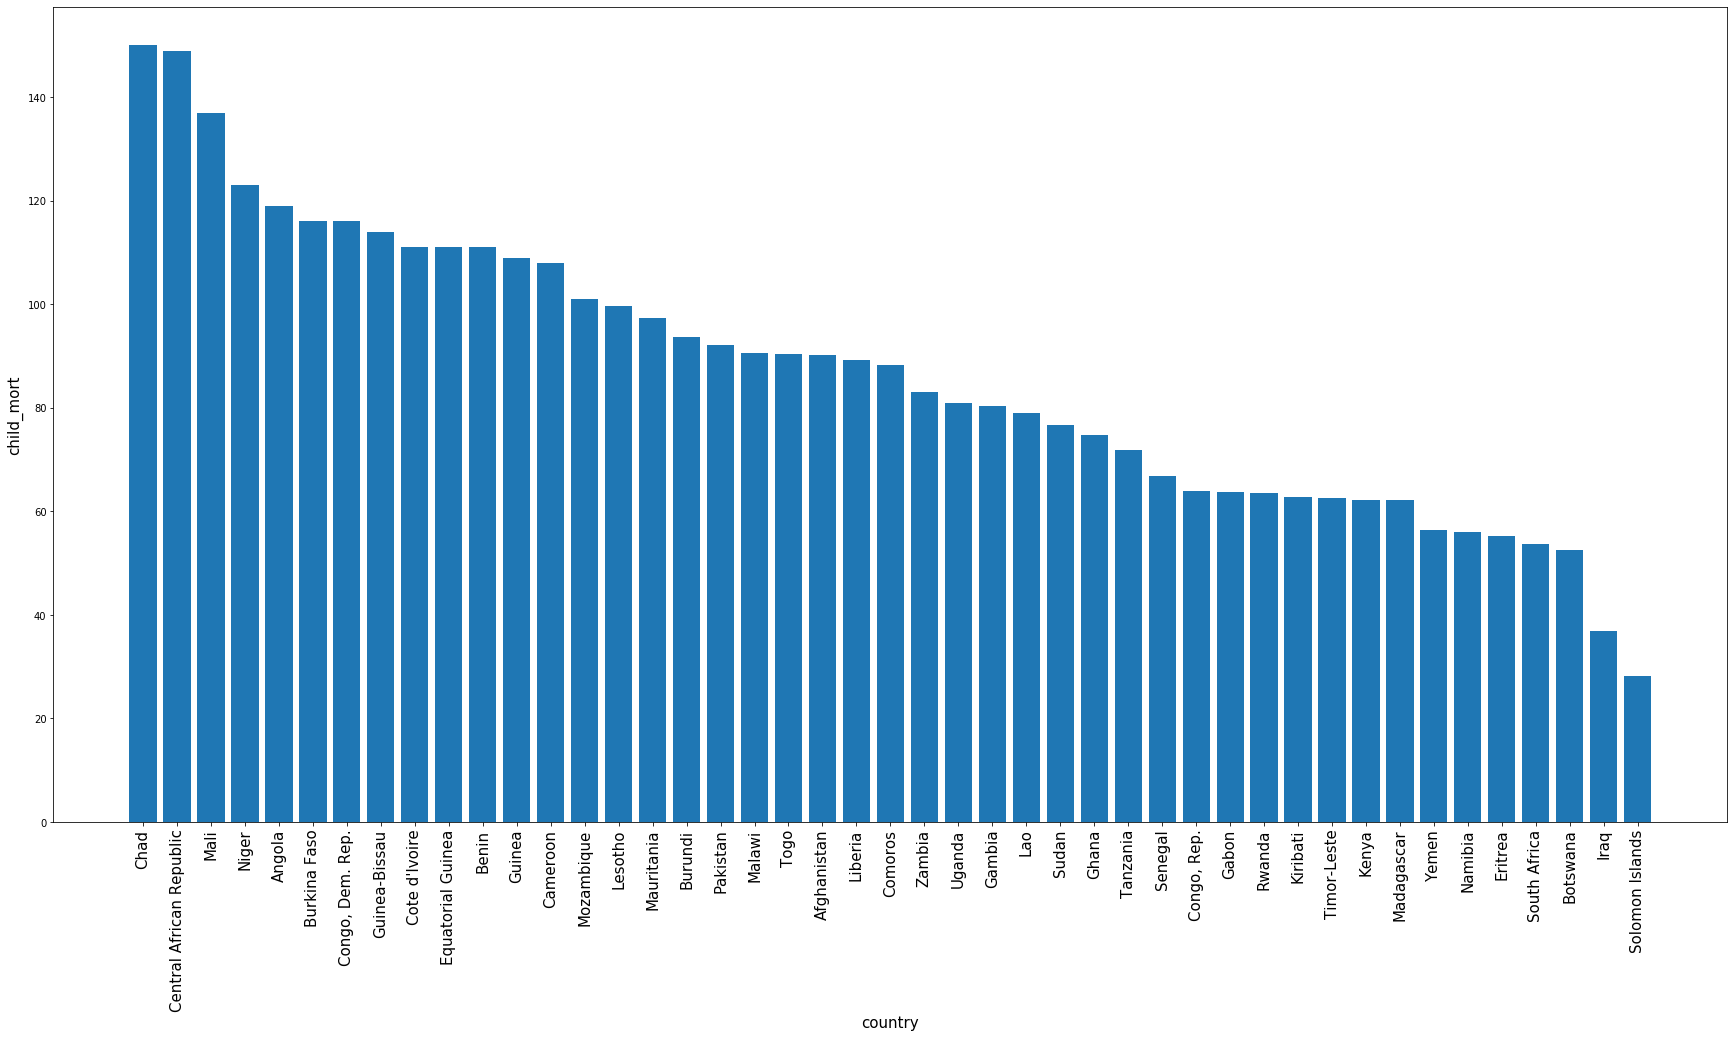

In [68]:

fig = plt.figure(figsize=(30, 15))
plt.bar(aid_need_sorted['country'],aid_need_sorted['child_mort'])
plt.xlabel('country', fontsize=15)
plt.ylabel('child_mort', fontsize=15)
plt.xticks(aid_need_sorted['country'], fontsize=15, rotation=90)
plt.savefig("Cluster0_child_mort.png")
plt.show()

In [70]:
aid_need_sorted.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_labels,country
30,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,32,0,Chad
29,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,31,0,Central African Republic
91,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,97,0,Mali
106,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,112,0,Niger
3,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3,0,Angola
23,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,25,0,Burkina Faso
35,116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,37,0,"Congo, Dem. Rep."
61,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,64,0,Guinea-Bissau
38,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,40,0,Cote d'Ivoire
46,111.0,14671.800,766.0800,10071.900,33700,24.90,60.9,5.21,17100,49,0,Equatorial Guinea


In [69]:
country_list_km


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']